In [1]:
import os
import csv
import numpy as np
import pandas as pd
import konlpy.tag

os.getcwd()
os.chdir('C:\\Users\\Leessx\\Desktop\\leezzx\\학교과제\텍스트마이닝')

#리스트 flat 함수
def flatten(l):
    flat_list = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flat_list.append(e)
        else:
            flat_list.append(elem)
    return flat_list

#문서 로딩
f = open("2005 스티브 잡스 연설문 (스탠포드 대학 졸업축사).txt", 'r', encoding='UTF8')
content = f.read()
f.close()   

#불필요한 기호 제거
filtered_content = content.replace('.', '').replace(',', '').replace("'","").replace('=', '').replace('\n', '')

#형태소 분석
Okt = konlpy.tag.Okt()
Okt_morphs = Okt.pos(filtered_content)

# 명사 추출
Noun_words = []
for word, pos in Okt_morphs:
    if pos == 'Noun':
        Noun_words.append(word)
    
#불용어 제거
stopwords = ['었습니다', '에서', '그것', '으로', '라는', '어떤', '었고', '습니다', '었던', '면서', '아고', '에게', '었을']
unique_Noun_words = set(Noun_words)
for j in unique_Noun_words:
    if j in stopwords:
        while j in Noun_words:
            Noun_words.remove(j)

#빈도계산
word_list2 = flatten(Noun_words)
word_list2 = pd.Series([x for x in word_list2 if len(x) > 1])
word_list2.value_counts().head(40)

여러분    23
모든     17
우리     16
대학     16
컴퓨터    12
가장     11
애플     10
사랑      9
지금      9
다른      8
시작      8
생각      8
죽음      8
사람      8
과목      7
당신      7
때문      7
회사      7
인생      6
자신      6
무엇      6
위해      6
입양      6
당시      5
만일      5
개월      5
미래      5
생모      5
서체      5
부부      5
이야기     5
졸업      5
마음      5
의사      4
경우      4
발견      4
그때      4
나중      4
자체      4
해고      4
dtype: int64

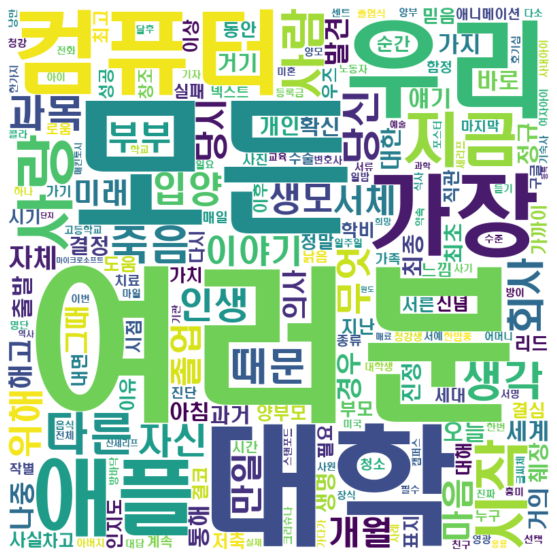

In [4]:
# 워드클라우드 생성
from wordcloud import WordCloud
from collections import Counter

wc = WordCloud(font_path='c:/Windows/Fonts/H2HDRM.TTF',
                width = 800,
                height = 800,
                background_color = 'white'
                )
cnt = Counter(word_list2)
wc = wc.generate_from_frequencies(cnt)


pl.figure(figsize=(10, 10))
pl.imshow(wc, interpolation='bilinear')
pl.axis('off')
pl.show()

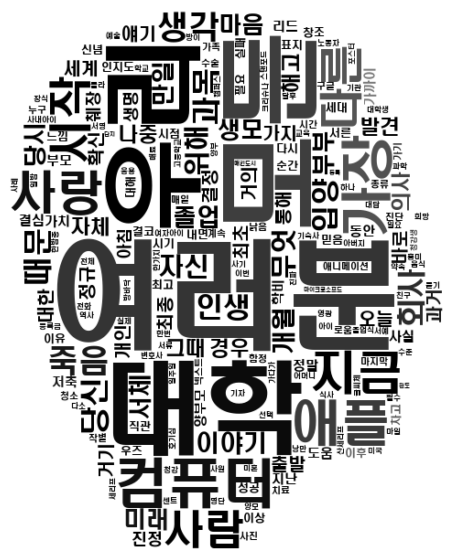

In [13]:
# 이미지를 활용하여 마스킹
from PIL import Image
Jobs_coloring = np.array(Image.open('steve-jobs-silhouette-hi.png'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(Jobs_coloring)

wc = WordCloud(font_path='c:/Windows/Fonts/H2HDRM.TTF',
                mask = Jobs_coloring,
                width = 800,
                height = 800,
                background_color = 'white'
                )
cnt = Counter(word_list2)
wc = wc.generate_from_frequencies(cnt)

pl.figure(figsize=(10, 10))
pl.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
pl.axis('off')
pl.show()